# The chaotic pendulum

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#make sure all the plots appear inline
%matplotlib inline

# Simple pendulum

Equation of motion of a simple pendulum. No vertical vibrations.

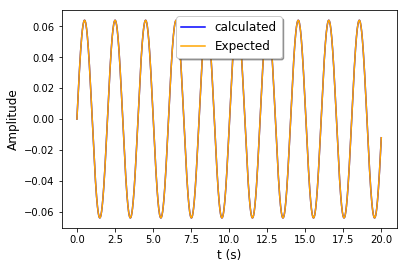

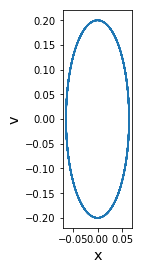

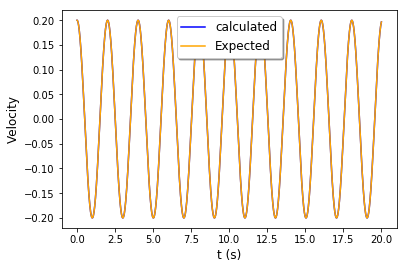

In [138]:
g=9.81   
l=1    # Longitude of the pendulum.

#function to calculate derivatives for h.osc.
def deriv(y,t):
    return np.array([y[1],-g/l*y[0]])

#rk4 does a single RK4 step
def rk4(y,dy,t,h):
    k1=dy(y,t)
    k2=dy(y+h/2*k1,t+h/2)
    k3=dy(y+h/2*k2,t+h/2)
    k4=dy(y+h*k3,t+h)
    y=y+h*(k1+2*k2+2*k3+k4)/6
    t=t+h
    return (t,y)

y=np.array([0,0.2])  # starting value for x, \dot{x}
t=0                 # time start
h=0.01               # step size
tmax=20             # where to end
ts=np.array([t])     # to store all times
ys=np.array([y])     # and all solution points

for i in range(int(tmax/h)):  # take enough steps (or so)
    (t,y)=rk4(y,deriv,t,h)
    ts=np.append(ts,t)
    ys=np.concatenate((ys,np.array([y])))

#now plot it all
[y1,y2]=ys.transpose()
#subfigure 1: Amplitude plot
fig1, ax1 = plt.subplots(1, 1)
ax1.plot(ts, y1, 'blue', label='calculated')
ax1.plot(ts, 0.2*np.sqrt(l/g)*np.sin(np.sqrt(g/l)*ts), 'orange', label='Expected')
ax1.legend(loc='upper center', shadow=True, fontsize='large')
#ax1.plot(ts, y2, label='velocity')
ax1.set_xlabel("t (s)",fontsize='large')
ax1.set_ylabel("Amplitude", fontsize='large')
plt.show()
#subfigure 2
fig2, ax2 = plt.subplots(1, 1)
ax2.plot(y1,y2)
ax2.set_aspect('equal')
ax2.set_xlabel("x",fontsize='x-large')
ax2.set_ylabel("v",fontsize='x-large')
plt.show()
#Velocity plot
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(ts, y2, 'blue', label='calculated')
ax3.plot(ts, 0.2*np.cos(np.sqrt(g/l)*ts), 'orange', label='Expected')
ax3.legend(loc='upper center', shadow=True, fontsize='large')
ax3.set_xlabel("t (s)",fontsize='large')
ax3.set_ylabel("Velocity", fontsize='large')
plt.show()

DIFFERENCE

In [11]:
print(np.abs(y1-0.2*np.sqrt(l/g)*np.sin(np.sqrt(g/l)*ts)))

[0.00000000e+00 1.60389753e-11 3.20569751e-11 ... 3.08093278e-08
 3.10859076e-08 3.13322412e-08]


### Dimensionless time variable

Equation of motion of a simple pendulum without vertical vibration, set $t'=\sqrt{g/l} t$

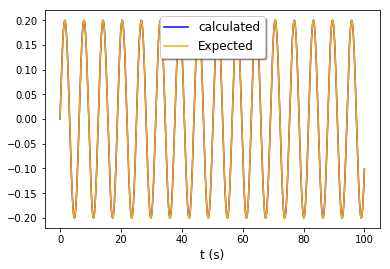

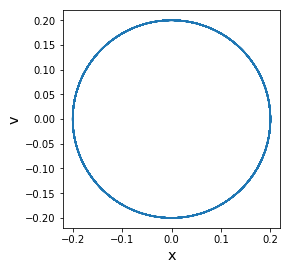

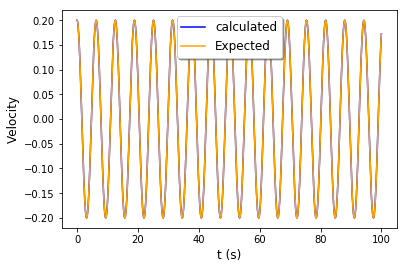

In [52]:

#function to calculate derivatives for h.osc.
def deriv_1(y,t):
    return np.array([y[1],-1*y[0]])

#rk4 does a single RK4 step
def rk4(y,dy,t,h):
    k1=dy(y,t)
    k2=dy(y+h/2*k1,t+h/2)
    k3=dy(y+h/2*k2,t+h/2)
    k4=dy(y+h*k3,t+h)
    y=y+h*(k1+2*k2+2*k3+k4)/6
    t=t+h
    return (t,y)

y=np.array([0,0.2])  # starting value for x, \dot{x}
t=0                  # time start
h=0.01               # step size
tmax=100              # where to end
ts_1=np.array([t])     # to store all times
ys_1=np.array([y])     # and all solution points

for i in range(int(tmax/h)):  # take enough steps (or so)
    (t,y)=rk4(y,deriv_1,t,h)
    ts_1=np.append(ts_1,t)
    ys_1=np.concatenate((ys_1,np.array([y])))

#now plot it all
[y1_1,y2_1]=ys_1.transpose()
#subfigure 1
fig1, ax1 = plt.subplots(1, 1)
ax1.plot(ts_1, y1_1, 'blue', label='calculated')
ax1.plot(ts_1, 0.2*np.sin(ts_1), 'orange', label='Expected')
#ax1.plot(ts, y2, label='velocity')
ax1.legend(loc='upper center', shadow=True, fontsize='large')
ax1.set_xlabel("t (s)",fontsize='large')
plt.show()
#subfigure 2
fig2, ax2 = plt.subplots(1, 1)
ax2.plot(y1_1,y2_1)
ax2.set_aspect('equal')
ax2.set_xlabel("x",fontsize='x-large')
ax2.set_ylabel("v",fontsize='x-large')
plt.show()
#Velocity plot
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(ts_1, y2_1, 'blue', label='calculated')
ax3.plot(ts_1, 0.2*np.cos(ts_1), 'orange', label='Expected')
ax3.legend(loc='upper center', shadow=True, fontsize='large')
ax3.set_xlabel("t (s)",fontsize='large')
ax3.set_ylabel("Velocity", fontsize='large')
plt.show()

In [70]:
import numpy as np

import matplotlib.pyplot as plt 

from scipy.integrate import odeint

import glob

import os



def simple_pendulum_deriv(x, t): 

    """The simple pendulum subject to zero damping and zero control input



    Based on material from the MIT OCW subject "Underactuated Robotics"

    "lecture 2: the simple pendulum" given by Russell Tedrake, the 

    maths and some of the related diagrams are given at about 51 minutes

    in.

    """

    nx = np.zeros(2)

    nx[0] = x[1]

    nx[1] = -( np.sin(x[0])) 

    return nx



def plot_orbit( x0 ):

    """Plot the phase space of the pendulum



    """

    # Pick ts to be sufficiently large (by inspection) to make sure

    # that all of the cases of interest will have reached their 

    # homoclinic orbit

    ts = np.linspace(0.0, 50.0, 1001)

    ys = odeint(simple_pendulum_deriv, x0, ts)

    plt.plot(ys[:,0], ys[:,1], 'black')



def plot_interesting_orbits():

    plt.clf()

    # start with zero velocity at a number of differing angles

    # scipy odeint does some pretty weird things if you have enough

    # velocity to loop around

    plot_orbit(np.array([np.pi * 0.25, 0.0]))

    plot_orbit(np.array([np.pi * 0.5, 0.0]))

    plot_orbit(np.array([np.pi * 0.9, 0.0]))

    plot_orbit(np.array([np.pi * 0.999, 0.0]))

    plt.title('homoclinic orbits for an undamped simpled pendulum')

    plt.xlabel(r'$\theta$')

    plt.ylabel(r'$\dot{\theta}$')

    plt.show()

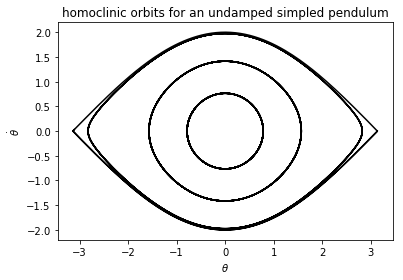

In [71]:
plot_interesting_orbits()

### Fixed points

$$Jacobian =\begin{pmatrix} 0 & 1 \\ -cos\theta & 0 \end{pmatrix}$$

Fixed point: $$(0,0)$$

$$ Jacobian=\begin{pmatrix} 0 & 1 \\ -1 & 0 \end{pmatrix}$$ This is the equivalent to a linear centre (linearization method for linear systems). The energy is conserved and is a local minimum at (0,0). **Non-linear centre**

Fixed point: $$(0, \pi)$$

$$Jacobian=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$

This is a **saddle point**

# Vibrated pendulum

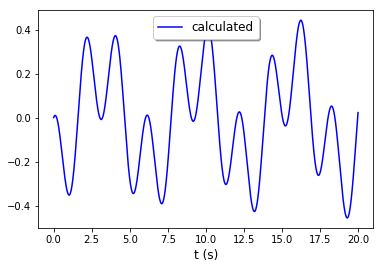

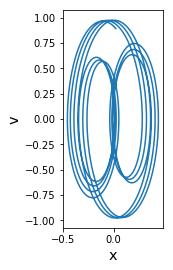

In [53]:
om2=1
g=9.81
l=1
a=2
om=1

#function to calculate derivatives for h.osc.
def deriv(y,t):
    return np.array([y[1],-g/l*np.sin(y[0])-(om**2*a/l)*np.cos(om*t)])

#rk4 does a single RK4 step
def rk4(y,dy,t,h):
    k1=dy(y,t)
    k2=dy(y+h/2*k1,t+h/2)
    k3=dy(y+h/2*k2,t+h/2)
    k4=dy(y+h*k3,t+h)
    y=y+h*(k1+2*k2+2*k3+k4)/6
    t=t+h
    return (t,y)

y=np.array([0,0.2])  # starting value for x, \dot{x}
t=0                  # time start
h=0.01               # step size
tmax=20             # where to end
ts=np.array([t])     # to store all times
ys=np.array([y])     # and all solution points

for i in range(int(tmax/h)):  # take enough steps (or so)
    (t,y)=rk4(y,deriv,t,h)
    ts=np.append(ts,t)
    ys=np.concatenate((ys,np.array([y])))

#now plot it all
[y1,y2]=ys.transpose()
#subfigure 1
fig1, ax1 = plt.subplots(1, 1)
ax1.plot(ts, y1, 'blue', label='calculated')
ax1.legend(loc='upper center', shadow=True, fontsize='large')
#ax1.plot(ts, y2, label='velocity')
ax1.set_xlabel("t (s)",fontsize='large')
plt.show()
#subfigure 2
fig2, ax2 = plt.subplots(1, 1)
ax2.plot(y1,y2)
ax2.set_aspect('equal')
ax2.set_xlabel("x",fontsize='x-large')
ax2.set_ylabel("v",fontsize='x-large')
plt.show()

# No theta approximation

In [ ]:
g=9.81
l=1

#function to calculate derivatives for h.osc.
def deriv(y,t):
    return np.array([y[1],-(g/l)*np.sin(y[0])])

#rk4 does a single RK4 step
def rk4(y,dy,t,h):
    k1=dy(y,t)
    k2=dy(y+h/2*k1,t+h/2)
    k3=dy(y+h/2*k2,t+h/2)
    k4=dy(y+h*k3,t+h)
    y=y+h*(k1+2*k2+2*k3+k4)/6
    t=t+h
    return (t,y)

y=np.array([0,0.2])  # starting value for x, \dot{x}
t=0                  # time start
h=0.01               # step size
tmax=20             # where to end
ts=np.array([t])     # to store all times
ys=np.array([y])     # and all solution points

for i in range(int(tmax/h)):  # take enough steps (or so)
    (t,y)=rk4(y,deriv,t,h)
    ts=np.append(ts,t)
    ys=np.concatenate((ys,np.array([y])))

#now plot it all
[y1,y2]=ys.transpose()
#subfigure 1: Amplitude plot
fig1, ax1 = plt.subplots(1, 1)
ax1.plot(ts, y1, 'blue')
#ax1.plot(ts, y2, label='velocity')
ax1.set_xlabel("t (s)",fontsize='large')
ax1.set_ylabel("Amplitude", fontsize='large')
plt.show()
#subfigure 2
fig2, ax2 = plt.subplots(1, 1)
ax2.plot(y1,y2)
ax2.set_aspect('equal')
ax2.set_xlabel("x",fontsize='x-large')
ax2.set_ylabel("v",fontsize='x-large')
plt.show()
#Velocity plot
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(ts, y2, 'blue')
ax3.set_xlabel("t (s)",fontsize='large')
ax3.set_ylabel("Velocity", fontsize='large')
plt.show()

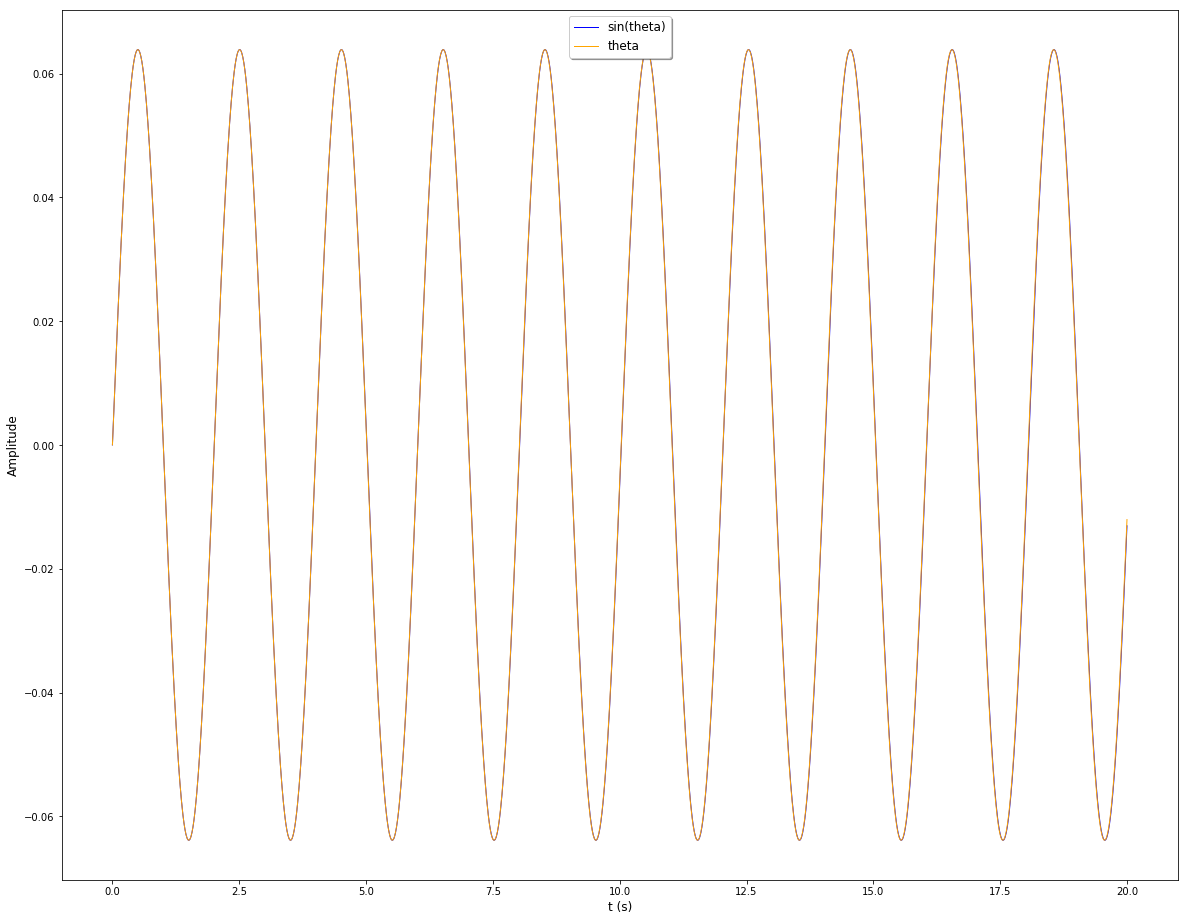

In [55]:
fig1, ax1 = plt.subplots(1, 1, figsize=(20,16))
ax1.plot(ts, y1, 'blue', label='sin(theta)', linewidth=1)
ax1.plot(ts, 0.2*np.sqrt(l/g)*np.sin(np.sqrt(g/l)*ts), 'orange', label='theta', linewidth=1)
ax1.legend(loc='upper center', shadow=True, fontsize='large')
#ax1.plot(ts, y2, label='velocity')
ax1.set_xlabel("t (s)",fontsize='large')
ax1.set_ylabel("Amplitude", fontsize='large')
plt.show()

# Periodically driven pendulum

### Change f, the others parameters are kept fixed

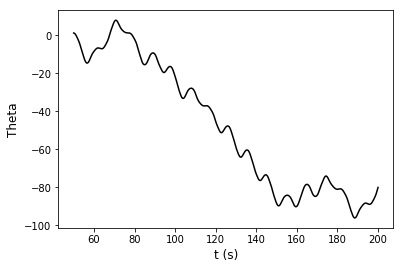

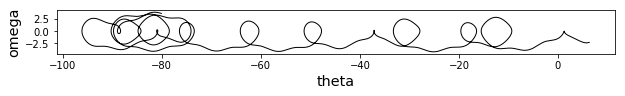

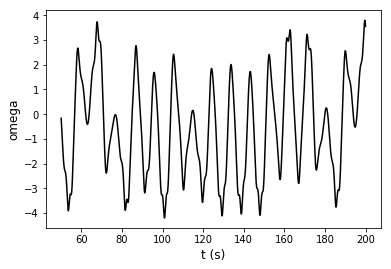

In [10]:
beta=0.1
f=1.47

#function to calculate derivatives for h.osc.
def deriv(y,t):
    return np.array([y[2], 2/3,-beta*y[2]-np.sin(y[0])+f*np.cos(y[1])])


#We want y[0] to go from -pi to pi. Restrict values of theta.

#rk4 does a single RK4 step
def rk4(y,dy,t,h):
    k1=dy(y,t)
    k2=dy(y+h/2*k1,t+h/2)
    k3=dy(y+h/2*k2,t+h/2)
    k4=dy(y+h*k3,t+h)
    y=y+h*(k1+2*k2+2*k3+k4)/6
    t=t+h
    
    return (t,y)

y=np.array([0,0,0.5])  # starting value for x, \dot{x}
t=0                  # time start
h=0.01               # step size
tmax=200           # where to end
ts=np.array([t])     # to store all times
ys=np.array([y])     # and all solution points

for i in range(int(tmax/h)):  # take enough steps (or so)
    (t,y)=rk4(y,deriv,t,h)
    ts=np.append(ts,t)
    ys=np.concatenate((ys,np.array([y])))

#now plot it all
[y1,y2, y3]=ys.transpose()
#subfigure 1: Amplitude plot
fig1, ax1 = plt.subplots(1, 1)
ax1.plot(ts[5000::], y1[5000::], 'black')
#ax1.plot(ts, y2, label='velocity')
ax1.set_xlabel("t (s)",fontsize='large')
ax1.set_ylabel("Theta", fontsize='large')
plt.show()
#subfigure 2
fig2, ax2 = plt.subplots(1, 1, figsize=(10,8))
ax2.plot(y1[7200::],y3[7200::], color='black', linewidth=1)
ax2.set_aspect('equal')
ax2.set_xlabel("theta",fontsize='x-large')
ax2.set_ylabel("omega",fontsize='x-large')
plt.show()
#Velocity plot
fig3, ax3 = plt.subplots(1, 1)
ax3.plot(ts[5000::], y3[5000::], 'black')
ax3.set_xlabel("t (s)",fontsize='large')
ax3.set_ylabel("omega", fontsize='large')
plt.show()

First oscillations are ignored, transient response

#### Dissipation, the system is dissipative for positive betas, as the rate of range of volume in phase space decreases for positive betas.

Restrict values of theta to be between pi and -pi

### Change beta, the others parameters are kept fixed

In [11]:
for i in range(7400, len(y1)):
    y1[i]=y1[i]%(2*np.pi)
    if y1[i]>np.pi:
        y1[i]= y1[i]-np.pi
    elif y1[i]<=np.pi:
        y1[i]=y1[i]+np.pi

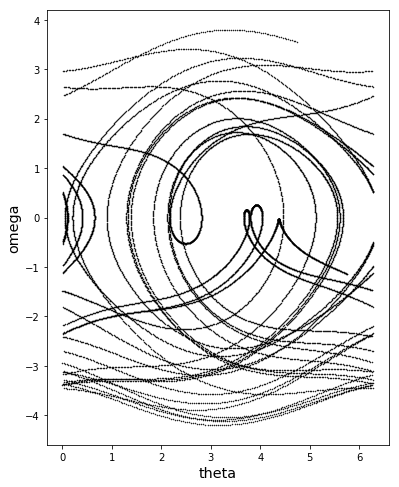

In [12]:
fig2, ax2 = plt.subplots(1, 1, figsize=(10,8))
ax2.plot(y1[7400::],y3[7400::], color='black', marker='o', linestyle='None', markersize=0.5)
ax2.set_aspect('equal')
ax2.set_xlabel("theta",fontsize='x-large')
ax2.set_ylabel("omega",fontsize='x-large')
plt.show()